In [1]:
import cluster
import acquire
import prepare
import summarize

In [2]:
df = acquire.wrangle_zillow()

In [ ]:
df.info()

In [6]:
summarize.nulls_by_col(df)

,num_rows_missing,pct_rows_missing
ac_type_id,0,0.0
bathroom_cnt,0,0.0
bedroom_cnt,0,0.0
sum_bath_and_bed,0,0.0
square_feet,0,0.0
full_bath_cnt,0,0.0
heating_type_id,0,0.0
latitude,0,0.0
longitude,0,0.0
lot_sqr_ft,0,0.0


    Getting rid of some ID columns, and the date one. 
    
    LAT-LONG stays because the split_data function cuts it off.

In [5]:
#df = df.drop(['transaction_date','property_land_use_code', 'id', 'parcel_id'], axis=1)
df = df.drop(['transaction_date','property_land_use_code', 'id', 'parcel_id','zipcode_id','fips_code', 'logerror', 'abs_logerror'], axis=1)

In [7]:
df = df.drop(['latitude','longitude'], axis=1)

# FOR THE MOMENT. NO TEST TRAIN SPLIT FOR MAKING CLUSTERS. THATS FOR LATER

In [8]:
df_standard, df2, std_object = cluster.standardize_train_test(df, df)

In [9]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73087 entries, 0 to 73423
Data columns (total 23 columns):
ac_type_id              73087 non-null float64
bathroom_cnt            73087 non-null float64
bedroom_cnt             73087 non-null float64
sum_bath_and_bed        73087 non-null float64
square_feet             73087 non-null float64
full_bath_cnt           73087 non-null float64
heating_type_id         73087 non-null float64
lot_sqr_ft              73087 non-null float64
property_land_use_id    73087 non-null float64
room_cnt                73087 non-null float64
building_value          73087 non-null float64
total_value             73087 non-null float64
land_value              73087 non-null float64
tax_amount              73087 non-null float64
census_block            73087 non-null float64
has_basement            73087 non-null float64
has_fireplace           73087 non-null float64
has_deck                73087 non-null float64
has_garage              73087 non-null float6

## Remove some outliers, maybe

In [ ]:
# prepare.remove_upper_outliers(df_standard., df_standard)

## It might be helpful

In [10]:
cluster.list_inertia_scores(df_standard)

1 : 3.9127133337498856
2 : 3.5746892408808297
3 : 3.367499999971086
4 : 3.1752448187827547
5 : 2.9742683955017815
6 : 2.952594026583732
7 : 2.9481488325781684
8 : 2.801289714935327
9 : 2.7880152969484895


In [ ]:
three_cluster_df = cluster.make_clusters(df_standard, n_clusters=3)

In [11]:
two_cluster_df = cluster.make_clusters(df_standard, n_clusters=2)

In [ ]:
three_cluster_df['cluster_labels'].value_counts()

In [12]:
two_cluster_df['cluster_labels'].value_counts()

0    53683
1    19404
Name: cluster_labels, dtype: int64

In [13]:
53683/len(two_cluster_df)

0.7345081888707978

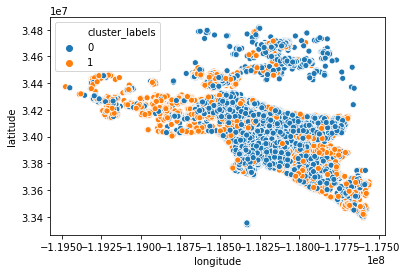

In [14]:
cluster.show_clusters_on_map(two_cluster_df)

In [ ]:
cluster_labels = two_cluster_df.cluster_labels

In [17]:
two_cluster_df.drop(['latitude','longitude','cluster_labels'],axis=1,inplace=True)

In [18]:
scaler, unscaled_df = cluster.my_inv_transform(std_object, two_cluster_df)

In [ ]:
unscaled_df.head()

In [19]:
unscaled_df['cluster_labels'] = cluster_labels

NameError: name 'cluster_labels' is not defined

In [ ]:
unscaled_df.groupby('cluster_labels').mean()

In [ ]:
cluster.show_clusters_on_map(unscaled_df)

In [ ]:
unscaled_df.abs_logerror.mean()

In [ ]:
unscaled_df.logerror.mean()

In [ ]:
unscaled_df.groupby('cluster_labels').logerror.mean()

In [ ]:
unscaled_df.groupby('cluster_labels').logerror.std()

In [ ]:
unscaled_df.logerror.std()

In [ ]:
unscaled_df.groupby('cluster_labels').total_value.mean()

In [ ]:
unscaled_df.groupby('cluster_labels').tax_amount.mean()